<!DOCTYPE html>
<html lang="de">
<head>
<meta charset="UTF-8">
<title>Quantenchemie – Roland Mitric</title>
<style>
  body {
    font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
    text-align: center;
    background: #f7f9fc;
    color: #222;
    margin-top: 15%;
  }
  h1 {
    font-size: 3em;
    margin-bottom: 0.2em;
  }
  h2 {
    font-weight: normal;
    margin: 0.2em;
  }
</style>
</head>
<body>
  <h1>Quantenchemie</h1>
  <h2>Roland Mitric</h2>
  <h2>Lehrstuhl für Theoretische Chemie</h2>
</body>
</html>



Diese Vorlesung führt in die Grundlagen und Methoden der **Quantenchemie** ein. Sie vermittelt das Verständnis, wie sich chemische Phänomene aus den quantenmechanischen Gesetzen der Mikrowelt ableiten lassen.

Die **Quantenchemie**, auch **molekulare Quantenmechanik** genannt, ist ein Teilgebiet der physikalischen Chemie, das die Gesetze der Quantenmechanik auf molekulare Systeme anwendet. Sie bildet die theoretische Grundlage unseres Verständnisses von zentralen chemischen Konzepten wie **molekularer Struktur**, **chemischer Bindung**, **Reaktivität** und **Spektroskopie**.

---

Das Hauptziel der Quantenchemie besteht darin, die **physikalischen und chemischen Eigenschaften** von Molekülen und Materialien **aus den quantenmechanischen Grundgleichungen vorherzusagen**. Dazu werden Näherungsverfahren entwickelt, die die sehr komplexen Vielteilchengleichungen der Quantenmechanik mathematisch und numerisch behandelbar machen. Diese Methoden reichen von der Hartree-Fock-Theorie über Dichtefunktionalverfahren bis hin zu hochgenauen Korrelationsmethoden und erlauben es, Strukturen, Energien, Spektren und Reaktionspfade mit hoher Genauigkeit zu berechnen.

---

Neben der Beschreibung stationärer Zustände gewinnt auch die **zeitabhängige Quantenchemie** an Bedeutung. Sie ermöglicht die Untersuchung von **elektronischer Dynamik**, **nichtadiabatischen Übergängen** und **lichtinduzierten Reaktionen**, die für Photochemie, Katalyse und Materialwissenschaften von zentraler Relevanz sind.

Die Quantenchemie verbindet die fundamentalen Prinzipien der Quantenphysik mit der 
Welt chemischer Phänomene. Sie eröffnet die Möglichkeit, die Eigenschaften komplexer Moleküle und Materialien bereits am Computer zu verstehen und gezielt vorherzusagen.

---

<div style="display: flex; align-items: flex-start; gap: 1.5rem;">

  <figure style="margin: 0;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/5/50/Paul_Dirac%2C_1933.jpg" alt="Paul Dirac, 1933" style="width:180px; border-radius:8px; box-shadow: 0 0 6px rgba(0,0,0,0.2);">
    <figcaption style="text-align:center; font-size:0.9em; color:#555;">Paul A. M. Dirac   (1902 – 1984)</figcaption>
  </figure>

  <blockquote style="font-size:1.05em; line-height:1.4; color:#222; margin:0;">
    The underlying physical laws necessary for the mathematical theory of a large part of physics and the <b>whole of chemistry</b> are thus completely known, and the difficulty is only that the exact application of these laws leads to equations much too complicated to be soluble. It therefore becomes desirable that approximate practical methods of applying quantum mechanics should be developed, which can lead to an explanation of the main features of complex atomic systems without too much computation.
    <br><br>
    <span style="font-size:0.9em; color:#555;">— P. A. M. Dirac, *Proceedings of the Royal Society A* (1929)</span>
  </blockquote>

</div>

<p style="font-size:0.8em; color:#777; margin-top:0.8rem;">
Image source: <a href="https://commons.wikimedia.org/wiki/File:Paul_Dirac,_1933.jpg">Wikimedia Commons</a>, public domain.
</p>


# Näherungsmethoden zur Lösung der stationären Schrödinger-Gleichung:

<h1> Das Variationsprinzip </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 2.
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['figure.figsize'] = [8, 6]
matplotlib.rcParams['animation.embed_limit'] = 1000
matplotlib.rcParams['text.usetex'] =  False
matplotlib.rcParams["font.family"] =  "sans-serif",
matplotlib.rcParams["font.sans-serif"] = ["Times"]
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
from ipywidgets import interact
import ipywidgets as widgets
#import pandas as pd

$$ \require{colors} $$

In [2]:
tocm=219474.
elmass=5.4857990e-4
auofmass=1./elmass
mH = 1.00784*auofmass

Wir habe in der PC 1 gesehen, dass man die Schrödingergleichung für einige wichtige Systeme analytisch lösen kann.

Beispiele waren: 

<ul> 
    <li >Teilchen im Potentialkasten mit unendliche hohen Wänden </li> 
    <li >Harmonischer Oszillator</li> 
    <li >Starrer Rotor</li> 
    <li >Das H-Atom</li> 
    <li > und einige weitere Systeme ... </li>
</ul>

Der Großteil der interessanten Quantensysteme ist aber **nicht exakt analytisch lösbar**. 

Insbesondere erfordert die Behandlung molekularer Systeme die Entwicklung effizienter Näherungsverfahren zur Lösung der molekularen Schrödingergleichung, da man kein einziges Molekül ohne Näherungen lösen kann!

Dies ist die Aufgabe der  **Quantenchemie**.

Eine große Zahl quantenchemischer Methoden beruht auf dem **Ritzschen Variationsprinzip**.


**Die Idee des Variationsverfahrens**: Man konstruiert eine analytische Form für die genäherte Wellenfunktion, die von einigen Parametern abhängig ist. Diese Parameter werden dann optimiert, so dass der Energieerwartungswert minimal wird. 


Betrachten wir nun ein System mit dem Hamiltonoperator $\hat H$: 
    
Wir nehmen an, dass das System einen Grundzustand mit der Energie $E_{0}$ hat. 
    
Die entsprechende (unbekannte) normierte exakte Wellenfunktion bezeichnen wir als $\psi _0$. 
    
Die exakte Wellenfunktion ist eine Eigenfunktion des Hamilton-Operators:

$$\hat{H}\psi_{0}=E_{0}\psi_{0}  $$


Äquivalent dazu ist der Erwartungswert der Energie in dem Grundzustand auch gleich $E_0$. Es gilt also:

$$ E_{0}=\int dV\psi_{0}^{*}\hat{H}\psi_{0} $$ 

mit der **Normierungsbedingung**:

$$\int dV\psi_{0}^{*}\psi_{0} = 1$$

Betrachten wir nun eine **beliebige normierte Test-Wellenfunktion** $\psi_{test}$, die die Randbedingungen des Problems erfüllt. Das heißt, dass die Funktion im gleichen Raum normierbar ist, wie die exakte Wellenfunktion.

Mit Hilfe dieser Test-Funktion können wir nun den Energie-Erwartungswert berechnen. 

Das Variationsprinzip besagt, dass der Erwartungswert der Energie der Test-Wellenfunktion immer **größer** als die exakte Grundzustandsenergie sein muss.

    
Für jede beliebige Test-Wellenfunktion gilt die folgende Beziehung (Variationssatz): 

$$ \require{color}
\fcolorbox{red}{#f2d5d3}{$  E[\psi_{test}]=\int dV\psi_{test}^{*}\hat{H}\psi_{test}\ge E_{0}  $}$$

mit der Normierungsbedingung:

$$\fcolorbox{red}{#f2d5d3}{$\int dV\psi_{test}^{*}\psi_{test} = 1$}$$ 



<u> Beweis </u>: 

Seien $\psi _n$ die **exakten** Eigenfunktionen des Hamiltonoperators:

$$\hat{H}\psi_{n}=E_{n}\psi_{n}\quad n=0,1,2\cdots.  $$

Die Eigenwerte können immer nach der Größe angeordnet werden. Also nehmen wir an, dass die Eigenwerte wie folgt sortiert sind:

$$ E_{0}\le E_{1}\le E_{2}\le\cdots\le E_{i}\le\cdots. $$

Die mathematischen Eigenschaften der hermiteschen Operatoren garantieren, dass die exakten Eigenfunktionen eine **vollständige orthonormierte** Basis bilden. 

Dies bedeutet, dass eine beliebige Test-Wellenfunktion, die die gleichen Randbedingungen erfüllt, exakt in der Basis zerlegt werden kann. 


Für eine beliebige Test-Wellenfunktion exisitiert also eine **exakte** Basis-Zerlegung in der Form: 

$$ \psi_{test}=\sum_{i}c_{i}\psi_{i} $$

wobei $c_i$ (unbekannte) Entwicklungskoeffizienten. Aus der Forderung, dass die Test-Wellenfunktion normiert sein muss, folgt:

$$ \int dV\psi_{test}^{*}\psi_{test}=1\rightarrow\sum_{i}\sum_{j}c_{i}^{*}c_{j}\left[\int dV\psi_{i}^{*}\psi_{j}\right]=1 $$

Dies ist eine **Nebenbedingung**, die die Entwicklungskoeffzienten $c_i$ erfüllen müssen. 

Wegen der Orthonormalität der exakten Eigenfunktionen des hermiteschen Operators $\hat H$ gilt aber auch:

$$ \int dV\psi_{i}^{*}\psi_{j}=\delta_{ij} $$

Damit vereinfacht sich die Normierungsbedingung auf:

$$ \sum_{i}|c_{i}^{2}|=1. $$

Für den Energie-Erwartungswert der Test-Wellenfunktion bekommen wir: 

$$ E[\psi_{test}]=\int dV\psi_{test}^{*}\hat{H}\psi_{test}=\sum_{i}\sum_{j}c_{i}^{*}c_{j}\int dV\psi_{i}^{*}\hat{H}\psi_{j}.  $$

Wir nutzen nun wieder die Annahme, dass $\psi_i $ und $\psi_j$ exakte orthonormierte Eigenfunktionen sind,

 $$ \hat{H}\psi_{j}=E_{j}\psi_{j} $$ 



Den Erwartungswert können wir damit in der folgenden Form schreiben:

$$ E[\psi_{test}]=\sum_{i}\sum_{j}c_{i}^{*}c_{j}E_{j}\int dV\psi_{i}^{*}\psi_{j} $$ 

Nun kommt wieder die Orthonormierung ins Spiel und wir erhalten:

$$ E[\psi_{test}]=\sum_{i}|c_{i}^{2}|E_{i}. $$ 

Da wir die Eigenwerte der Größe nach sortiert haben gilt ferner die folgende Ungleichheit:

$$ E[\psi_{test}]=|c_{0}^{2}|E_{0}+|c_{1}^{2}|E_{1}+|c_{2}^{2}|E_{2}+\cdots\ge|c_{0}^{2}|E_{0}+|c_{1}^{2}|E_{0}+|c_{2}^{2}|E_{0}+\cdots $$ 

$$ E[\psi_{test}]\ge E_{0}\left(|c_{0}^{2}|+|c_{1}^{2}|+|c_{2}^{2}|+\cdots\right). $$

Da aber die Wellenfunktion normiert ist gilt,

$$ \sum_{i}|c_{i}^{2}|=1 $$ 

Damit haben wir bewiesen, dass die Energie der Test-Wellenfunktion immer größer oder gleich als die exakte Grundzustandsenergie ist. Für jede **beliebige** Test-Wellenfunktion:

$$ \require{color}\fcolorbox{red}{#f2d5d3}{$E[\psi_{test}]\ge E_{0}$} $$


Die Bedeutung des Variationsprinzips liegt darin, dass uns jede beliebige Funktion schon Information über die obere Grenze für die exakte Energie liefert. Darüber hinaus bietet uns das Variationsprinzip auch die Möglichkeit die Wellenfuntion und die Energie **systematisch** duch Erweiterung des Variationsraumes zu verbessern.

Das Variationsprinzip ist vielleicht die wichtigste Näherungsmethode in der Quantenchemie.
Eine große Zahl wichtiger quanten-chemischer Methoden beruht direkt auf dem Variationsprinzip!


Wie funktionieren variationelle Methoden der Quantenchemie?

Man konstruiert einen physikalisch motivierten Ansatz für die Wellenfunktion, in dem freie Parameter auftreten:

$$\psi(\mathbf{x})\rightarrow\psi_{test}(\mathbf{x},\beta_{1},\beta_{2},\cdots,\beta_{n})$$ 

Dadurch bechränkt man den Raum aller denkbaren Funktionen sich auf eine bestimmte parametrisierte Schar von Funktionen. Die "beste" Wellenfunktion im Rahmen des gewählten Ansatzes erhält man indem man die Energie 

$$ E [\psi_{test} ] $$ 

im Bezug auf die Variationsparameter $ \beta_{1},\beta_{2},\cdots,\beta_{n}$ minimiert!

# Beispiel: Teilchen im $V(x) = \alpha x^4$ Potential

Das Variationsverfahren wird hier zunächst an einem einfachen Beispiel illustriert. Wir betrachten ein Teilchen in einem (anharmonischen) Potential mit der analytischen Form:

$$ V(x) = \alpha x^4 \quad \alpha.  > 0 $$

Die stationäre Schrödingergleichung für dieses Problem lautet:

$$ -\frac{\hbar^{2}}{2m}\frac{d^{2}\psi}{dx^{2}}+\alpha x^{4}\psi=E\psi, $$

und ist nicht exakt analytisch lösbar. 

Wie wählt man den passenden Ansatz für die Anwendung des Variationsprinzips?

Die Wahl der Test-Wellenfunktion ist meistens physikalisch motiviert. Wegem der geraden Symmetrie des Potentials erwartem wir, dass der niedrigste Eigenzustand durch eine gerade Funktion beschrieben wird,  die wegen der Normierbarkeit im Unendlichen verschwinden muss. 

Das Problem ähnelt dem harmonischen Oszillator, dessen Lösung wir exakt kennen. 

Also wählen wir als Ansatz eine Gaussfunktion mit der (inversen) Breite $\beta$ als Parameter:

$$ \psi_{test}(x; \beta)=N\exp(-\beta x^{2}) $$



In [3]:
from sympy import *
hbar, m = symbols('hbar m', real = True, positive = True) 
x = symbols('x', real = True) 
alpha, beta, E = symbols('alpha beta E', real = True, positive = True) 
V = alpha * x**4

In [4]:
psi = exp(-beta * x**2)
norm = integrate(psi**2,(x,-oo,oo))
norm

sqrt(2)*sqrt(pi)/(2*sqrt(beta))

Der Ansatz muss zunächst normiert werden:

$$ \int_{-\infty}^{\infty}dx\psi_{test}^{*}\psi_{test}=1\rightarrow N^{2}\int_{-\infty}^{\infty}dxe^{-2\beta x^{2}}=1 $$

Dazu berechnen wir das Gauss-Integral: 

\$$ \int_{-\infty}^{\infty}dxe^{-2\beta x^{2}}=\sqrt{\frac{\pi}{2\beta}}. $$

Daraus ergibt sich die normierte Wellenfunktion als: 

$$ \psi_{test}(x)=\left(\frac{2\beta}{\pi}\right)^{\frac{1}{4}}\exp(-\beta x^{2}) $$

In [5]:
V_lam = lambdify([alpha,x], V)
psi_lam = lambdify([beta, x], psi)
xrange = np.linspace(-1,1,100)
vrange = V_lam(1.0,xrange)

def plot_psi(beta):
    plt.plot(xrange,vrange, color = "blue", linewidth = 3.0)
    yrange = psi_lam(beta, xrange)
    plt.plot(xrange,yrange, color = "red", linewidth = 3.0)
    plt.fill_between(xrange, yrange, color = "red", alpha = 0.25)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$V(x),\psi(x)$', fontsize = 24)


In [6]:
interact(plot_psi, beta=widgets.FloatSlider(value=5, min=2, max=100, step=2))


interactive(children=(FloatSlider(value=5.0, description='beta', min=2.0, step=2.0), Output()), _dom_classes=(…

<function __main__.plot_psi(beta)>

In [7]:
def T_psi(psi):
    return simplify(-(hbar**2/(2*m))*diff(diff(psi,x),x))
def V_psi(V,psi):
    return simplify(V*psi)
def H_psi(V,psi):
    return simplify(T_psi(psi)+V_psi(V,psi))

In [8]:
simplify(psi*H_psi(V, psi))

(alpha*m*x**4 - beta*hbar**2*(2*beta*x**2 - 1))*exp(-2*beta*x**2)/m

In [9]:
E_psi = simplify(integrate(psi*H_psi(V, psi), (x,-oo,oo))/norm)
E_psi

3*alpha/(16*beta**2) + beta*hbar**2/(2*m)

Mit diesem Ansatz berechnen wir nun den Erwartungswert der Energie:

$$E[\psi]\rightarrow E(\beta)=\left(\frac{2\beta}{\pi}\right)^{\frac{1}{2}}\int_{-\infty}^{\infty}dx\exp(-\beta x^{2})\left[-\frac{\hbar^{2}}{2m}\frac{d^{2}}{dx^{2}}+\alpha x^{4}\right]\exp(-\beta x^{2})$$

$$E(\beta)=\left(\frac{2\beta}{\pi}\right)^{\frac{1}{2}}\int_{-\infty}^{\infty}dx\frac{\left(\alpha mx^{4}-\beta\hbar^{2}\left(2\beta x^{2}-1\right)\right)e^{-2\beta x^{2}}}{m}$$

Sympy liefert als Ergebnis die Energie als Funktion von $\beta$:

$$ E(\beta) = \frac{3 \alpha}{16 \beta^{2}} + \frac{\beta \hbar^{2}}{2 m} $$

Um den besten Wert von $\beta$ zu bestimmen, muss diese Funktion nun minimert werden!


Zunächst schauen wir uns die Funktion graphisch an...

In [10]:
E_psi_lam = lambdify([beta, alpha, hbar, m], E_psi)
beta_range = np.linspace(0.3, 2, 100)
E_test = E_psi_lam(beta_range, 1,1,1)

Text(0, 0.5, '$E(\\beta)$')

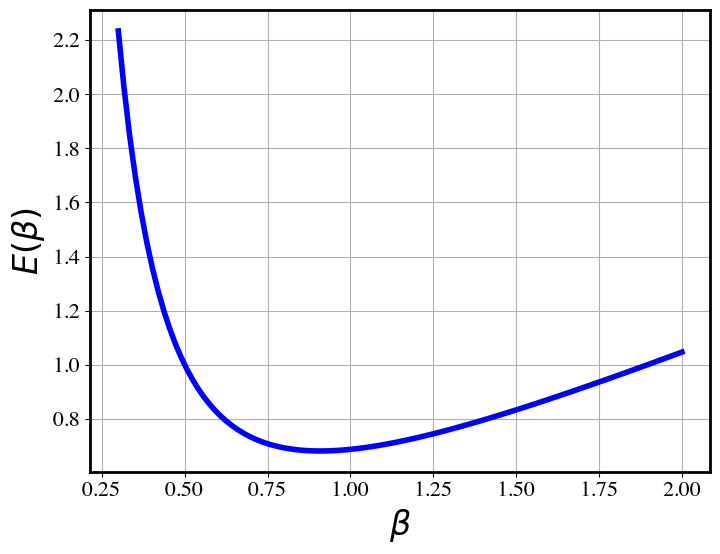

In [11]:
plt.plot(beta_range, E_test, color = "blue", lw = 4.0)
plt.xlabel(r'$\beta$', fontsize = 24)
plt.ylabel(r'$E(\beta)$', fontsize = 24)

In [12]:
diff(E_psi, beta)

-3*alpha/(8*beta**3) + hbar**2/(2*m)

In [13]:
beta_opt = solve(diff(E_psi, beta), beta)
beta_opt = simplify(beta_opt[0])
psi_opt = psi.subs({beta: beta_opt })
beta_opt

6**(1/3)*alpha**(1/3)*m**(1/3)/(2*hbar**(2/3))

In [14]:
psi_opt

exp(-6**(1/3)*alpha**(1/3)*m**(1/3)*x**2/(2*hbar**(2/3)))

In [15]:
E_psi_lam = lambdify([beta, alpha, hbar, m], E_psi)
E_psi_lam(beta_opt, alpha, hbar, m)

0.375*6**(1/3)*alpha**(1/3)*hbar**(4/3)/m**(2/3)

Als optimalen Wert von $\beta$ bekommen wir:

$$ \beta_{opt}=\sqrt[3]{\frac{3\alpha m}{4\hbar^{2}}}$$

Die variationell bestimmte Energie hat den Wert:

$$ E_{min}=\frac{3}{8}\sqrt[3]{\frac{6\alpha\hbar^{4}}{m^{2}}} $$

Wir haben damit eine variationelle Abschätzung für die Grundzustandsenergie des Systems und wissen nun, dass die exakte Energie irgendwo unterhalb dieses Wertes liegt:

$$ 0 \le E_0 \le \frac{3}{8}\sqrt[3]{\frac{6\alpha\hbar^{4}}{m^{2}}} $$

Wir wissen aber überhaupt nicht, wie gut unser Ergebnis wirklich ist. Das Variatiosprinzip liefert uns erstmal nur die obere Grenze für die exakte Energie. 

Im folgenden werden wir uns damit befassen, wie man die variationelle Abschätzung der Energie systematisch verbessern kann. 

Die Grundidee dabei ist, dass man den Variationsraum systematisch vergrößert in der Hoffnung, dass die Energiewerte sich dem exakten Wert beliebig nahe annähern!


# Die Methode von Ritz-Galerkin

<h1> Motivation </h1>

Betrachten wir als Motivation ein Teilchen in einem beliebigen eindimensionalen Potential, das keine besondere Symmetrie aufweist und mehrere Mulden mit unterschiedlichen Tiefen haben kann. Ein Beispiel für ein solches beliebiges Potential könnte wie das auf der folgenden Abbildung aussehen.

In [16]:
def Vgauss(x,centers = [4.5, -3.5, 1.0, 2.0, 5.0], widths = [2.0, 1.0, 0.2, 0.4, 0.8], V0 = [-0.5,-1.0,-0.4,-.2,0.2]):
    result = 0.0
    for c,w,v in zip(centers, widths, V0):
        result+= v*np.exp(-w*(x-c)**2)
    return result

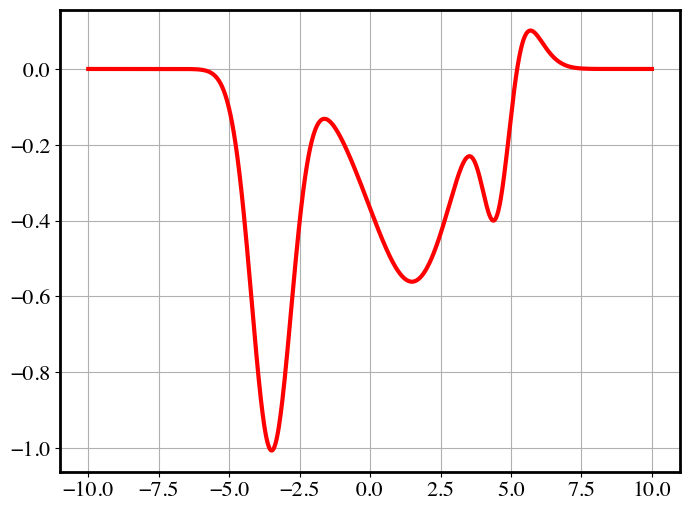

In [17]:
plt.clf()
x_plot = np.linspace(-10,10,1000)
V_plot = Vgauss(x_plot)
plt.plot(x_plot, V_plot,  color = "r", linewidth = 3.0)


In [18]:
plt.show()

Wir wissen, dass ein Quantenteilchen in einem Zustand niedriger Energie dazu neigt, sich in der Nähe eines Potentialminimums aufzuhalten und in klassisch verbotenen Bereichen exponentiell zu verschwinden. Wie könnten wir einen Variationsansatz konstruieren, der flexibel genug ist, um ein solches Verhalten zu erfassen?

Eine Möglichkeit, einen solchen Ansatz zu definieren, besteht darin, den interessierenden Raum mit Basisfunktionen abzudecken, die eine feste Form haben, und den Beitrag jeder Basisfunktion durch Multiplikation mit einem linearen Koeffizienten zu modulieren. Auf diese Weise werden die linearen Koeffizienten zu Knöpfen, die dem Ansatz die Möglichkeit geben, jedes interessierende System zu beschreiben.

In [19]:
%matplotlib notebook

In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Define the Gaussian potential function
def Vgauss(x, centers, widths, V0):
    result = 0.0
    for c, w, v in zip(centers, widths, V0):
        result += v * np.exp(-w * (x - c) ** 2)
    return result

def gaussbf(x, c, w):
    return np.exp(-w * (x - c) ** 2)

def psi_ritz(x, coef, centers, widths):
    result = 0.0
    for c, center, width in zip(coef, centers, widths):
        result += c * gaussbf(x, center, width)
    return result

# Define the number of equidistant Gaussian basis functions
num_basis_functions = 10

<IPython.core.display.Javascript object>


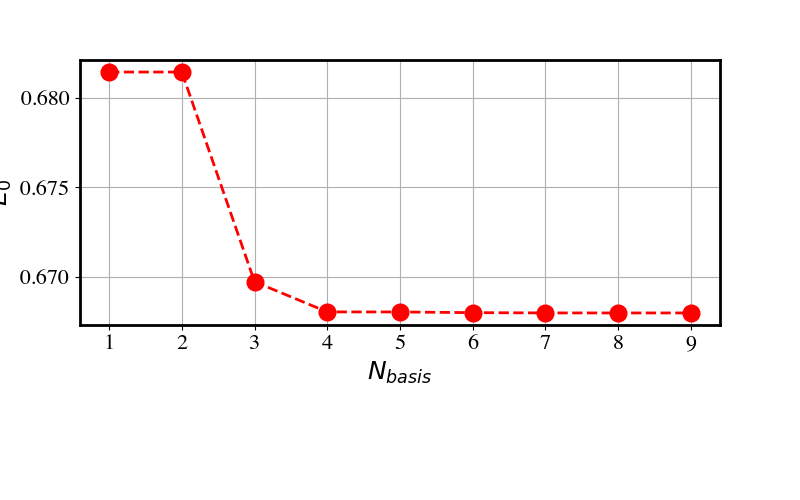

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(left=0.1, bottom=0.35)
x_plot = np.linspace(-10, 10, 1000)
potential_centers = np.linspace(-5, 5, num_basis_functions)
potential_widths = np.ones(num_basis_functions)
potential_contributions =  np.random.randn(num_basis_functions)
gaussian_centers = np.linspace(-5, 5, num_basis_functions)
gaussian_widths = np.ones(num_basis_functions)
initial_coefficients = np.ones(num_basis_functions)
potential = Vgauss(x_plot, potential_centers, potential_widths, potential_contributions)
psival = psi_ritz(x_plot, initial_coefficients, gaussian_centers, gaussian_widths)
line, = plt.plot(x_plot, potential, lw=2)
line1, = plt.plot(x_plot, psival, lw=2, color="r")
ax_contributions = []

for i in range(num_basis_functions):
    ax_contributions.append(plt.axes([0.1, 0.0 + 0.02 * i, 0.65, 0.03], facecolor=ax.get_facecolor()))
sliders_coefficients = []
for i in range(num_basis_functions):
    sliders_coefficients.append(Slider(ax_contributions[i], f'c_ {i+1}', -2.0, 2.0, valinit=0.0))
def update(val):
    coefficients = [slider.val for slider in sliders_coefficients]
    updated_psi = psi_ritz(x_plot, coefficients, gaussian_centers, gaussian_widths)
    line1.set_ydata(updated_psi)  # Update the wavefunction plot
    fig.canvas.draw_idle()
for i in range(num_basis_functions):
    sliders_coefficients[i].on_changed(update)

In der Methode von Ritz-Galerkin wird die Test-Wellenfunktion als **lineare** Kombination **fester** linear unabhängiger Basisfunktionen dargestellt:

$$ \require{color}\fcolorbox{red}{#f2d5d3}{$\psi_{test}=\sum_{i=1}^{N}c_{i}\varphi_{i}$} $$

Die Parameter, die man varieren kann, sind durch die Entwicklungskoeffizienten $c_i$ gegeben, während die $\varphi_i$ feste von uns gewählte Basisfunktionen darstellen. $N$ ist die Anzahl der Basisfunktionen. 

In dem Fall, dass die gewählten Basisfunktionen eine vollständige Basis bilden, konvergiert der variationell berechnete Wert für Energie zu dem exakten Wert, wenn $N\rightarrow \infty$. 

Der große Vorteil dieses linearen Variationsverfahrens ist, dass die Optimierung von variationellen Parametern auf die Lösung **linearer** Gleichungsysteme führt. Diese können effizient mit den Methoden der numerischen linearen Algebra auf modernen Rechnern gelöst werden. Aus diesem Grund stellt das lineare Variationsverfahren eine der wichtigsten Grundlagen der Quantenchemie dar. 

<h1> Berechnung der optimalen Entwicklungskoeffizienten $c_i$</h1>

Mit diesem linearen Ansatz können wir ähnlich wie bei dem Beweis des Variationssatzes den Erwartungswert der Energie berechnen. 

$$ E[\psi_{test}]=\int dV\psi_{test}^{*}\hat{H}\psi_{test}=\sum_{i}\sum_{j}c_{i}^{*}c_{j}\int dV\varphi_{i}^{*}\hat{H}\varphi_{j} $$

Da die $\varphi _i$ aber in diesem Fall im Allgemeinen keine exakten Eigenfunktionen des Hamiltonoperators sind, lässt sich das Integral auf der rechten Seite nicht weiter vereinfachen. Wir führen die folgende Bezeichnung ein:

$$ H_{ij}=\int dV\varphi_{i}^{*}\hat{H}\varphi_{j}. $$

$H_{ij}$ sind die Matrixelemente des Hamilton-Operators in der gewählten Basis. 

Damit der Ansatz normiert ist, müssen die Variationsparameter $c_i$ die folgende Beziehung erfüllen:

$$ \int dV\psi_{test}^{*}\psi_{test}=1\rightarrow\sum_{i}\sum_{j}c_{i}^{*}c_{j}\left[\int dV\varphi_{i}^{*}\varphi_{j}\right]=1.  $$

Wir definieren die Überlappungmatrix $\mathbf S$ mit den Matrixelementen:

$$ S_{ij}=\int dV\varphi_{i}^{*}\varphi_{j},$$

so dass man die Normierungsbedingung auch als:

$$ \sum_{i}\sum_{j}c_{i}^{*}c_{j}S_{ij}=1 $$

ausdrücken kann. 

Der Erwartungswert der Energie lautet damit:

$$E[\psi_{test}]=\sum_{i}\sum_{j}c_{i}^{*}c_{j}H_{ij}$$

mit der Nebenbedingung:

$$ \sum_{i}\sum_{j}c_{i}^{*}c_{j}S_{ij}=1 $$

In dem allgemeinen Fall, wenn die $c$'s komplex sind, enthält die Normierungsbedingung zwei unabhängige Bedingungen, da der Realteil und der Imaginärteil beide unabhängig voneinander verschwinden müssen. Äquivalent dazu muss auch 

$$ \sum_{i}\sum_{j}c_{i}c_{j}^{*}S_{ij}^{*}=1 $$

gelten, was man leicht sieht, wenn man die Normierungsbedingung komplex konjugiert. 

Um die optimalen Werte für die $c_i$ zu bestimmen, muss der Erwartungswert minimiert werden. Da wir eine zusätzliche Nebenbedingung haben, verwenden wir für die Minimierung die Methode der Lagrange-Multiplikatoren, die aus der Mathematik bekannt ist.

Wir definieren dazu die Lagrange-Funktion:

$$\mathcal{L}(c_{1},\cdots,c_{N},\lambda)=E[\psi_{test}]-\lambda\left(\sum_{i}\sum_{j}c_{i}^{*}c_{j}S_{ij}-1\right)-\lambda^{*}\left(\sum_{i}\sum_{j}c_{i}c_{j}^{*}S_{ij}^{*}-1\right),$$

$$\mathcal{L}(c_{1},\cdots,c_{N},\lambda)=\sum_{i}\sum_{j}c_{i}^{*}c_{j}H_{ij}-\lambda\left(\sum_{i}\sum_{j}c_{i}^{*}c_{j}S_{ij}-1\right) - \lambda^{*}\left(\sum_{i}\sum_{j}c_{i}c_{j}^{*}S_{ij}^{*}-1\right)$$

Diese Funktion hängt von den $c_i$'s und den Lagrange-Multiplikatoren $\lambda$ und $\lambda^*$ ab. Da die $c_i$'s im Allgemeinen komplex sind,

$$c_{i}=a_{i}+ib_{i} \quad c_{i}^{*}=a_{i}-ib_{i} $$

können der Realteil $a_i$ und der Imaginärteil $b_i$ unabgängig voneinander variiert werden. 


Die Lagrange-Funktion $\mathcal{L}$ hat einen stationären Punkt, wenn:

$$ \frac{\partial\mathcal{L}}{\partial a_{i}}=0 \quad \forall i = 1, \cdots N $$

$$ \frac{\partial\mathcal{L}}{\partial b_{i}}=0 \quad \forall i = 1, \cdots N $$

$$ \frac{\partial\mathcal{L}}{\partial \lambda}=0 $$

und 

$$ \frac{\partial\mathcal{L}}{\partial \lambda^*}=0 $$

Die Ableitungen der Lagrange-Funktion nach dem Realteil $a_i$ und dem Imaginärteil $b_i$ kann man mit Hilfe der Kettenregel wie folgt umformen:

$$\frac{\partial\mathcal{L}}{\partial a_{i}}=\frac{\partial\mathcal{L}}{\partial c_{i}}\frac{\partial c_{i}}{\partial a_{i}}+\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}\frac{\partial c_{i}^{*}}{\partial a_{i}}=\frac{\partial\mathcal{L}}{\partial c_{i}}+\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}$$

$$\frac{\partial\mathcal{L}}{\partial b_{i}}=\frac{\partial\mathcal{L}}{\partial c_{i}}\frac{\partial c_{i}}{\partial b_{i}}+\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}\frac{\partial c_{i}^{*}}{\partial b_{i}}=i\frac{\partial\mathcal{L}}{\partial c_{i}}-i\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}$$

Aus der Stationaritätsbedingung folgt dann:

$$\frac{\partial\mathcal{L}}{\partial a_{i}}=0\rightarrow\frac{\partial\mathcal{L}}{\partial c_{i}}+\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}=0$$

$$\frac{\partial\mathcal{L}}{\partial b_{i}}=0\rightarrow\frac{\partial\mathcal{L}}{\partial c_{i}}-\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}=0$$

Daraus folgt:
    
$$ \frac{\partial\mathcal{L}}{\partial c_{i}}=0 $$

und 

$$\frac{\partial\mathcal{L}}{\partial c_{i}^{*}}=0$$

Wir sehen also, dass man $c_i$ und $c_i^*$ als unabhängige Variablen betrachten kann und separat beide Ableitungen verschwinden müssen. Dies ist ein nützlicher Trick, den man in der Quantenchemie oft verwendet...

Wir berechnen im Folgenden die beiden Ableitungen explizit. Für jeden beliebigen Wert des Indexes $k$ gilt:
    
$$\frac{\partial\mathcal{L}}{\partial c_{k}^{*}}=0\rightarrow\sum_{j}c_{j}\left(H_{kj}-(\lambda+\lambda^{*})S_{kj}\right)=0\quad\forall k=1,\cdots,N $$
    
$$ \frac{\partial\mathcal{L}}{\partial c_{k}}=0\rightarrow\sum_{i}c_{i}^{*}\left(H_{ik}-(\lambda+\lambda^{*})S_{ik}\right)=0\quad\forall k=1,\cdots,N $$

Für die Matrixelemente gilt wegen der Hermitezität $ H_{jk}^{*}=H_{kj} $ und $  S_{jk}^{*}=S_{kj} $, so dass sich die zweite Bedingung einfach durch komplexe Konjugierung aus der ersten ergibt. 

Da $\lambda +\lambda^*$ reell ist, führen wir die folgende Abkürzung ein:

$$ \epsilon=\lambda+\lambda^{*} $$




Damit erhalten wir für die optimalen Variationsparameter $c$ folgendes System von **homogenen linearen Gleichungen**:

$$\require{color}\fcolorbox{red}{#f2d5d3}{$\sum_{j}\left(H_{kj}-\epsilon S_{kj}\right)c_{j}=0\quad k=1,\cdots,N$}$$

Aus der linearen Algebra wissen wir, dass ein homogenes System nur dann eine nichttriviale Lösung besitzt, wenn:

$$ \require{color}\fcolorbox{red}{#f2d5d3}{$\det\left(\mathbf{H-\epsilon\mathbf{S}}\right)=0 $}$$

Die Lösung dieser Polynom-Gleichung liefert uns die variationelle Abschätzung für die Energie der niedrigsten $N$ Zustände!

# Beispiel: Teilchen im $V(x) = \alpha x^4$ Potential

<h2> Systematische Verbesserung durch lineare Variation </h2>

Wir haben am Beispiel des Teilchens im quartischen Potential eine Näherung für den Grundzustand durch Optimierung des Gaußfunktions-Ansatzes gefunden: 

$$ \psi_{test}(x; \beta)=N\exp(-\beta_{opt} x^{2}) $$

Diese wollen wir nun systematisch verbessern. Wir wissen, dass der Grundzustand durch eine gerade Wellenfunktion beschrieben wird. Dies bedeutet, dass wir als Basissatz nur gerade Funktionen betrachten müssen. 

Wir betrachten den folgenden Satz von $N$ Basisfunktionen:

$$ \psi_{n}(x)=x^{2n}\exp\left(-\beta_{opt}x^{2}\right)\quad n=0,\cdots,N-1 $$

Alle diese Funktionen sind gerade. Daraus bilden wir den **linearen** Variationsansatz: 

$$ \varphi_{n}(x)=x^{2n}\exp\left(-\beta_{opt}x^{2}\right)\quad n=0,\cdots,N-1 $$


In [22]:
def Tij(psi_i,psi_j):
    return simplify(integrate(psi_i*T_psi(psi_j),(x,-oo,+oo)))
def Vij(psi_i,psi_j, V):
    return simplify(integrate(psi_i*V_psi(V,psi_j),(x,-oo,+oo)))
def Hij(psi_i, psi_j, V):
    return simplify(Tij(psi_i,psi_j) + Vij(psi_i,psi_j,V))
def Sij(psi_i, psi_j):
    return simplify(integrate(psi_i*psi_j,(x,-oo,+oo)))

In [23]:
E_exact = simplify(Hij(psi_opt, psi_opt, V)/Sij(psi_opt,psi_opt))
print(latex(E_exact))

\frac{3 \cdot \sqrt[3]{6} \sqrt[3]{\alpha} \hbar^{\frac{4}{3}}}{8 m^{\frac{2}{3}}}


In [24]:
Nbasis = 5
xrange = np.linspace(-2,2,100)
vrange = V_lam(1.0,xrange)
basis = [x**(2*i)*psi_opt for i in range(Nbasis)]
basis_lam = [lambdify([alpha, m, hbar, x],basis[i]) for i in range(Nbasis)]
plt.plot(xrange,vrange, color = "blue", linewidth = 3.0)
xrange = np.linspace(-5,5,100)

for i in range(Nbasis):
    print(i)
    yrange = basis_lam[i](1,1,1,xrange)
    plt.plot(xrange,yrange, color = "red", linewidth = 3.0)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$V(x),\psi(x)$', fontsize = 24)
plt.show()

0
1
2
3
4


Berechnung der Überlappmatrix $\mathbf S$

Die Elemente der Überlappmatrix können wie folgt berechnet werden:
    
$$    S_{ij}=\int_{-\infty}^{+\infty}dx\varphi_{i}(x)\varphi_{j}(x)=\int_{-\infty}^{+\infty}dxx^{2(i+j)}\exp(-2\beta_{opt}x^{2}) $$

Das entsprechende Integral kann mit Sympy analytisch berechnet werden. Analog dazu können wir auch die Matrixelemente des Hamilton-Operators berechnen: 



In [25]:
i,j = symbols('i j', integer = True)
psi1 = (x**2*i)*psi_opt
psi2 = (x**2*j)*psi_opt
Sij(psi1,psi2)

6**(1/6)*sqrt(pi)*hbar**(5/3)*i*j/(8*alpha**(5/6)*m**(5/6))

In [26]:
from scipy.linalg import eig
def getEnergy(N):
    basis = [x**(2*i)*psi_opt for i in range(N)]
    S = zeros(N, N)
    H = zeros(N, N)
    for i, psi_i in enumerate(basis):
        for j , psi_j in enumerate(basis):
            H[i,j] = Hij(psi_i, psi_j, V)
            S[i,j] = Sij(psi_i, psi_j)
    H_lam = lambdify([alpha, m, hbar], H)
    S_lam = lambdify([alpha, m, hbar], S)
    HH = H_lam(1.0,1.0,1.0)
    SS = S_lam(1.0,1.0,1.0)
    u,v = eig(HH,SS)
    return min(u.real)

energies = []
for i in range(1,10,1):
    energies.append(getEnergy(i))
energies = np.array(energies)


In [27]:
plt.clf()
plt.plot(range(1,10,1),energies,'o', c='red', markersize = 12)
plt.plot(range(1,10,1),energies,'--', c='red', lw = 2.0)
plt.xlabel(r'$N_{basis}$')
plt.ylabel(r'$E_0$')
plt.show()

In [28]:
print(energies)

[0.68142022 0.68142022 0.66972609 0.6680444  0.66804151 0.66800256
 0.66798763 0.6679864  0.66798592]
